In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [ ]:
from google.colab import drive 
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
loans = pd.read_csv('/content/gdrive/My Drive/Lending Capstone Project/accepted_2007_to_2018Q4.csv.gz')  

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#making the column transformations  

years = loans['emp_length'] 
years = years.str.extract(r'(\d+)') 
loans['emp_length'] = [float(x) for x in years[0]]
loans['year_issued'] = pd.to_datetime(loans['issue_d']).dt.year
loans['month_issued'] = pd.to_datetime(loans['issue_d']).dt.month  
loans['loan_status'] = loans['loan_status'].str.replace('Does not meet the credit policy. Status:', '') 
terms = loans['term'] 
terms = terms.str.extract(r'(\d+)')
loans['term'] = [float(x) for x in terms[0]] 
times = (pd.to_datetime(loans['last_pymnt_d']) - pd.to_datetime(loans['issue_d'])) / np.timedelta64(1, 'M') 
loans['loan_duration'] = times.round()
loans['profits'] = (loans['total_pymnt'] - loans['loan_amnt']) / loans['loan_amnt'] 

In [ ]:
finished_loans = loans.loc[(loans.loan_status == 'Charged Off') | (loans.loan_status == 'Fully Paid') | (loans.loan_status == 'Default')] 

In [ ]:
A5_loans = finished_loans.loc[(finished_loans.sub_grade == 'A5')]

In [ ]:
A5_loans.shape

(64056, 155)

In [ ]:
A5_loans['loan_status'].value_counts()

Fully Paid     58670
Charged Off     5384
Default            2
Name: loan_status, dtype: int64

In [ ]:
#begin importing the sklearn modules for transforming & feature scaling here 
#columns we are not looking at are issued date 
A5_loans = A5_loans[['annual_inc', 'application_type', 'dti', 'issue_d', 'earliest_cr_line', 'emp_length', 'fico_range_high', 'fico_range_low', 'funded_amnt', 'home_ownership', 'inq_fi', 'inq_last_12m', 'installment', 'int_rate', 'loan_amnt', 'open_acc', 'percent_bc_gt_75', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'sub_grade', 'tax_liens', 'total_acc', 'revol_bal', 'delinq_amnt', 'delinq_2yrs', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'loan_status']]

In [ ]:
A5_loans.isna().sum()

annual_inc                         1
application_type                   0
dti                                9
issue_d                            0
earliest_cr_line                   2
emp_length                      3213
fico_range_high                    0
fico_range_low                     0
funded_amnt                        0
home_ownership                     0
inq_fi                         42445
inq_last_12m                   42445
installment                        0
int_rate                           0
loan_amnt                          0
open_acc                           2
percent_bc_gt_75                3704
pub_rec                            2
pub_rec_bankruptcies              42
purpose                            0
sub_grade                          0
tax_liens                          4
total_acc                          2
revol_bal                          0
delinq_amnt                        2
delinq_2yrs                        2
mths_since_last_delinq         35782
m

In [ ]:
D = (pd.to_datetime(A5_loans['issue_d']) - pd.to_datetime(A5_loans['earliest_cr_line'])) / np.timedelta64(1, 'Y') 
A5_loans['cr_yeargap'] = D.round() 

In [ ]:
A5_loans['loan_status'] = A5_loans['loan_status'].str.replace("Default", "Charged Off")

In [ ]:
A5_loans['avg_fico_score'] = (A5_loans['fico_range_low'] + A5_loans['fico_range_high']) / 2

In [ ]:
A5_loans['mths_since_last_delinq'].fillna(-999, inplace = True) 
A5_loans['mths_since_last_major_derog'].fillna(-999, inplace = True) 
A5_loans['inq_fi'].fillna(-999, inplace = True)  
A5_loans['inq_last_12m'].fillna(-999, inplace = True) 
A5_loans['percent_bc_gt_75'].fillna(-999, inplace = True)
A5_loans['emp_length'].fillna(-999, inplace = True) 
A5_loans['dti'].fillna(-999, inplace = True) 
A5_loans['delinq_amnt'].fillna(-999, inplace = True) 
A5_loans['delinq_2yrs'].fillna(-999, inplace = True) 
A5_loans['cr_yeargap'].fillna(-999, inplace = True)
A5_loans['tax_liens'].fillna(-999, inplace = True) 
A5_loans['pub_rec'].fillna(-999, inplace = True) 
A5_loans['pub_rec_bankruptcies'].fillna(-999, inplace = True) 
A5_loans['open_acc'].fillna(-999, inplace = True) 
A5_loans['total_acc'].fillna(-999, inplace = True) 
A5_loans['earliest_cr_line'].fillna(-999, inplace = True) 

In [ ]:
A5_loans = A5_loans.dropna(subset= ['annual_inc'])
A5_loans.isna().sum()

annual_inc                     0
application_type               0
dti                            0
issue_d                        0
earliest_cr_line               0
emp_length                     0
fico_range_high                0
fico_range_low                 0
funded_amnt                    0
home_ownership                 0
inq_fi                         0
inq_last_12m                   0
installment                    0
int_rate                       0
loan_amnt                      0
open_acc                       0
percent_bc_gt_75               0
pub_rec                        0
pub_rec_bankruptcies           0
purpose                        0
sub_grade                      0
tax_liens                      0
total_acc                      0
revol_bal                      0
delinq_amnt                    0
delinq_2yrs                    0
mths_since_last_delinq         0
mths_since_last_major_derog    0
loan_status                    0
cr_yeargap                     0
avg_fico_s

In [ ]:
A5_loans[['home_ownership', 'application_type', 'purpose']] =  A5_loans[['home_ownership', 'application_type', 'purpose']].astype('category')


In [ ]:
A5_loans['home_ownership_cat'] =  A5_loans['home_ownership'].cat.codes 
A5_loans['application_type_cat'] = A5_loans['application_type'].cat.codes 
A5_loans['purpose_cat'] = A5_loans['purpose'].cat.codes 

In [ ]:
A5_loans['loan_status'] = (A5_loans["loan_status"] == "Charged Off").astype(np.int)
#CD_loans = CD_loans.drop(['issue_d', 'earliest_cr_line', 'loan_status', 'fico_range_high', 'fico_range_low', 
#                        'home_ownership', 'application_type', 'purpose', 'sub_grade'], axis = 1) 
A5_loans.head()

,annual_inc,application_type,dti,issue_d,earliest_cr_line,emp_length,fico_range_high,fico_range_low,funded_amnt,home_ownership,inq_fi,inq_last_12m,installment,int_rate,loan_amnt,open_acc,percent_bc_gt_75,pub_rec,pub_rec_bankruptcies,purpose,sub_grade,tax_liens,total_acc,revol_bal,delinq_amnt,delinq_2yrs,mths_since_last_delinq,mths_since_last_major_derog,loan_status,cr_yeargap,avg_fico_score,home_ownership_cat,application_type_cat,purpose_cat
59,40100.0,Individual,10.81,Dec-2015,Oct-1998,2.0,684.0,680.0,10000.0,RENT,0.0,1.0,312.95,7.91,10000.0,4.0,0.0,0.0,0.0,credit_card,A5,0.0,7.0,6664.0,0.0,0.0,-999.0,-999.0,0,17.0,682.0,5,0,1
89,32000.0,Individual,13.73,Dec-2015,Feb-2012,6.0,689.0,685.0,5000.0,RENT,1.0,1.0,156.48,7.91,5000.0,7.0,0.0,1.0,1.0,credit_card,A5,0.0,10.0,5552.0,0.0,0.0,-999.0,-999.0,0,4.0,687.0,5,0,1
111,105000.0,Individual,14.45,Dec-2015,May-2006,10.0,689.0,685.0,6000.0,MORTGAGE,3.0,1.0,187.77,7.91,6000.0,9.0,0.0,3.0,0.0,car,A5,3.0,11.0,8353.0,0.0,0.0,-999.0,-999.0,0,10.0,687.0,1,0,0
152,25000.0,Individual,29.91,Dec-2015,Oct-2008,2.0,744.0,740.0,10000.0,OWN,1.0,2.0,312.95,7.91,10000.0,16.0,0.0,0.0,0.0,debt_consolidation,A5,0.0,30.0,9053.0,0.0,0.0,-999.0,-999.0,1,7.0,742.0,4,0,2
153,49000.0,Individual,17.92,Dec-2015,Nov-2004,10.0,799.0,795.0,6000.0,MORTGAGE,0.0,0.0,187.77,7.91,6000.0,10.0,0.0,0.0,0.0,debt_consolidation,A5,0.0,16.0,2212.0,0.0,0.0,-999.0,-999.0,0,11.0,797.0,1,0,2


In [ ]:
A5_loans = A5_loans.drop(['issue_d', 'earliest_cr_line', 'fico_range_high', 'fico_range_low', 
                        'home_ownership', 'application_type', 'purpose', 'sub_grade'], axis = 1) 

In [ ]:
A5_loans['loan_status'].mean()

0.08408399032081805

In [144]:
from sklearn.preprocessing  import StandardScaler  
from sklearn.neighbors import KNeighborsClassifier 
 
A5_feats = A5_loans.drop('loan_status', axis = 1) 
A5_labels = A5_loans['loan_status']

scales = StandardScaler().fit_transform(A5_feats)

scaled_data = pd.DataFrame(scales)

KNN = KNeighborsClassifier(n_neighbors = 300)  
KNN.fit(scaled_data, A5_labels) 
KNN_preds = KNN.predict(scaled_data) 

A5_loans['KNN_Predictions'] = KNN_preds

In [145]:
from sklearn.model_selection import train_test_split, cross_val_score  

train_data, test_data = train_test_split(A5_loans, train_size = 0.7, test_size= 0.3, random_state = 42)

In [ ]:
 #Number of Ones
 train_data['loan_status'].sum()

3821

In [146]:
#Number of Zeros 
train_data.shape[0] -  train_data['loan_status'].sum()

41017

In [ ]:
#Number to Upsize by  
(train_data.shape[0] -  train_data['loan_status'].sum()) - train_data['loan_status'].sum()

346233

In [147]:
#WE UPSAMPLE THE DATA IN ORDER TO IMPROVE THE PREDICTIONS FOR DEFAULTS
from sklearn.utils import resample 
major = train_data.loc[train_data.loan_status == 0] 
minor = train_data.loc[train_data.loan_status == 1] 

minority_upsampled = resample(minor, replace = True, n_samples = 41017, random_state = 42) 

#majority_downsampled = resample(major, replace = False, n_samples = 250000, random_state = 42, stratify = major['sub_grade_cat'])

sampled_data = pd.concat([minority_upsampled, major])
sampled_data['loan_status'].mean()

0.5

In [148]:
train_labels = sampled_data['loan_status'] 
train_feats = sampled_data.drop('loan_status', axis= 1)

In [149]:
test_feats = test_data.drop('loan_status', axis = 1) 
test_labels = test_data['loan_status']

In [ ]:
sampled_data.shape

(82034, 26)

In [ ]:
##TRANISITONING TO XGBOOST  

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, StratifiedKFold


In [156]:
import xgboost as xgb 

xgb_clf = xgb.XGBClassifier(n_estimators = 1000, learning_rate= 0.05, subsample= 0.6, random_state= 42)   
%time cross_val_score(xgb_clf, train_feats, train_labels, scoring= 'accuracy', cv = 3) 


CPU times: user 2min 56s, sys: 152 ms, total: 2min 56s
Wall time: 2min 56s


array([0.70093253, 0.70074968, 0.70051931])

In [157]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict

train_pred = cross_val_predict(xgb_clf, train_feats, train_labels, cv =3)

In [158]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score 

print('Training Precision %.2f' %(precision_score(train_labels, train_pred)))
print('Training Recall %.2f' %(recall_score(train_labels, train_pred)))
confusion_matrix(train_labels, train_pred)

Training Precision 0.70
Training Recall 0.71


array([[28215, 12802],
       [11748, 29269]])

In [159]:
xgb_clf.fit(train_feats, train_labels) 
test_pred = xgb_clf.predict(test_feats)

In [160]:
print('Test Precision %.2f' %(precision_score(test_labels, test_pred)))
print('Test Recall %.2f' %(recall_score(test_labels, test_pred)))
confusion_matrix(test_labels, test_pred)

Test Precision 0.11
Test Recall 0.45


array([[12094,  5558],
       [  868,   697]])

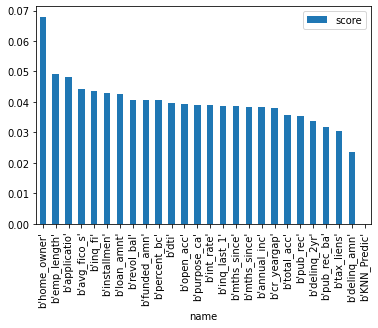

In [155]:
feature_importance = list(zip(train_feats.columns, xgb_clf.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
name, score = zip(*list(feature_sort))
pd.DataFrame({'name':name,'score':score}).plot.bar(x='name', y='score')